**EDA and Feature Extraction**

In [215]:
import numpy as np                 # importing python libraries  [code snippet-1]
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
s=pd.read_csv('C:\\Users\\Admin\\Downloads\\walmart-recruiting-trip-type-classification (1)\\train.csv.csv')
# code to read csv file
#'s' is the dataframe created,to do analysis.  

# [code snippet-2]

**Rudimentary Analysis:-**

In [217]:
s.head()  # [code snippet-3]

# head() command use to find first 5 rows of table or dataframe.

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [218]:
print("Number of rows: "+str(s.shape[0]))      # [code snippet-4]
print("Number of columns: "+str(s.shape[1]))
s.shape # this gives size of 's'
# finding no. of rows and columns in 's'


Number of rows: 647054
Number of columns: 7


(647054, 7)

In [219]:
s.loc[s.duplicated()].shape    # [code snippet-5]

# finding size of duplicated data present in 's'
# Pandas s.duplicated() method helps in analyzing duplicate values in 's'

(7192, 7)

In [220]:
s.loc[s.duplicated()]   #  [code snippet-6]

# Pandas 's.loc' attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
# 's.loc' returns the value present at the desired location in the given DataFrame.

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
50,21,15,Friday,5.011390e+11,1,FABRICS AND CRAFTS,1309.0
59,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
135,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
461,8,225,Friday,4.093000e+03,1,PRODUCE,4008.0
576,40,274,Friday,4.127197e+09,1,FROZEN FOODS,9100.0
...,...,...,...,...,...,...,...
646376,24,191169,Sunday,4.900003e+09,1,DSD GROCERY,9546.0
646430,24,191177,Sunday,7.065200e+09,1,COOK AND DINE,905.0
646525,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
646607,33,191227,Sunday,4.894150e+11,1,CELEBRATION,306.0


In [221]:
s = s.drop_duplicates() # dropping the duplicate values present in 's' 
s.shape # checking the size of 's' after checking the duplicate values

#  [code snippet-7]

(639862, 7)

In [222]:
s.describe() # basic description about 's' is shown
# s.describe() - Generates descriptive statistics include those that summarize following parameters:-
                #count - tells the no of NoN empty rows of the feature
                #mean - tells the mean value of the feature
                #std - gives the standard deviation of the feature
                #min - gives the minimum value of the feature
                #25%, 50%, 75% - represents the quartile information helpful for detecting the outliers
                #max - gives the maximum value of the feature

#  [code snippet-8]              

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,639862.000000,639862.000000,6.369840e+05,639862.000000,636984.000000
mean,58.283597,96202.936579,2.873255e+10,1.110783,3730.974387
std,156.597822,55552.547291,8.262338e+10,0.702241,2778.910147
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49321.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97103.000000,7.047049e+09,1.000000,3353.000000
75%,40.000000,144367.000000,3.004101e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789710e+11,71.000000,9998.000000


In [223]:
s.describe().T # taking traspose of 's' for better visualization of dataset

#  [code snippet-9]

,count,mean,std,min,25%,50%,75%,max
TripType,639862.0,5.828360e+01,1.565978e+02,3.0,2.700000e+01,3.900000e+01,4.000000e+01,9.990000e+02
VisitNumber,639862.0,9.620294e+04,5.555255e+04,5.0,4.932100e+04,9.710300e+04,1.443670e+05,1.913470e+05
Upc,636984.0,2.873255e+10,8.262338e+10,834.0,3.400001e+09,7.047049e+09,3.004101e+10,9.789710e+11
ScanCount,639862.0,1.110783e+00,7.022415e-01,-12.0,1.000000e+00,1.000000e+00,1.000000e+00,7.100000e+01
FinelineNumber,636984.0,3.730974e+03,2.778910e+03,0.0,1.404000e+03,3.353000e+03,5.501000e+03,9.998000e+03


In [224]:
s.dtypes # shows data types of different fields present in dataset 's' 

#  [code snippet-10]

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [225]:
s.columns # shows all the columns of 's'

#  [code snippet-11]

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [226]:
s.info() 
# Pandas "s.info()" function is used to get a concise summary of the dataframe,
# provides information about a DataFrame including the index dtype and columns, non-null values and memory usage.
# It comes really handy when doing exploratory analysis of the data.

#  [code snippet-12]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639862 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               639862 non-null  int64  
 1   VisitNumber            639862 non-null  int64  
 2   Weekday                639862 non-null  object 
 3   Upc                    636984 non-null  float64
 4   ScanCount              639862 non-null  int64  
 5   DepartmentDescription  638596 non-null  object 
 6   FinelineNumber         636984 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.1+ MB


**Observations[code snippet 3-12]:-**

1- Basis analysis and details about dataset 's' is done.

2- Here general information or insights about dataset is drawn.

3- Duplicaty of data is eliminated.

In [227]:
s.isnull().sum() # gives the sum of null or missing values present in each fields.
# 's.isnull()' checks null or NaN values.
# 'NaN' stands for 'Not A Number' and is one of the common ways to represent the missing value in the data.

#  [code snippet-13]

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      2878
ScanCount                   0
DepartmentDescription    1266
FinelineNumber           2878
dtype: int64

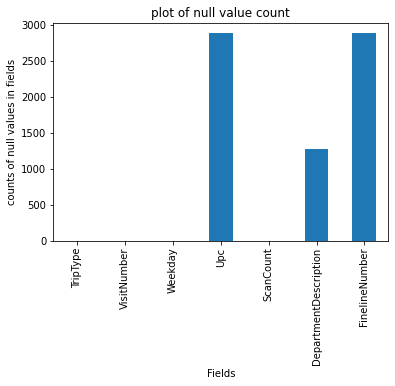

In [228]:
s.isnull().sum().plot(kind="bar") # plotting sum of null values in each fields in a bar graph for better visualization. 
plt.xlabel('Fields')
plt.ylabel('counts of null values in fields')
plt.title('plot of null value count')                                     #  [code snippet-14]
plt.show()

In [229]:
print(s.dropna(axis=0)) # dropping the null values present in 's'  

#  [code snippet-15]

        TripType  VisitNumber Weekday           Upc  ScanCount  \
0            999            5  Friday  6.811315e+10         -1   
1             30            7  Friday  6.053882e+10          1   
2             30            7  Friday  7.410811e+09          1   
3             26            8  Friday  2.238404e+09          2   
4             26            8  Friday  2.006614e+09          2   
...          ...          ...     ...           ...        ...   
647049        39       191346  Sunday  3.239000e+10          1   
647050        39       191346  Sunday  7.874205e+09          1   
647051        39       191346  Sunday  4.072000e+03          1   
647052         8       191347  Sunday  4.190008e+09          1   
647053         8       191347  Sunday  3.800060e+09          1   

        DepartmentDescription  FinelineNumber  
0          FINANCIAL SERVICES          1000.0  
1                       SHOES          8931.0  
2               PERSONAL CARE          4504.0  
3       PAINT A

In [230]:
s_nullrem=s.dropna(axis=0) # s_nullrem is our new dataframe with null values removed

#  [code snippet-16]

In [231]:
s_nullrem.shape # shows of the size of new dataframe with null values removed

#  [code snippet-17]

(636984, 7)

In [232]:
s_nullrem.isnull().sum() # finding sum of null values in new dataset, to cross check our operations

#  [code snippet-18]

TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64

In [233]:
s_nullrem.head()   

#  [code snippet-19] 

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


**Observations[code snippets 13-19]:-**

1- Checking whether dataset 's' containing any null values,because many ML algorithms cannot handle null values.

2- sorting issues of null values by dropping them.

3- After removal of the null values from 's', reassigning the desired datas in 's_nullrem'.

**Univariate Analysis:-**

In [234]:
s_nullrem.TripType.value_counts() # counting the occurences of each trip type present in 'TripType' column.

# output of this code snippet shows that the dataset is imbalanced, because of huge variations in the counts of trip types.

#  [code snippet-20] 

40     172705
39      94856
37      38645
38      29342
25      26642
7       23048
8       22630
36      21848
44      20093
42      19110
24      17663
999     16869
9       16555
32      13703
35      12339
5       11181
33       9850
15       7047
3        6814
43       6270
41       5404
30       4805
34       4684
27       4533
21       3957
22       3553
6        3369
20       3090
18       2931
28       2613
26       2477
12       2092
29       2090
31       1752
19       1183
4         889
23        323
14         29
Name: TripType, dtype: int64

In [235]:
len(s_nullrem['TripType'].unique()) # shows the number of unique trip types present in coloum 'TripType'

#  [code snippet-21] 

38

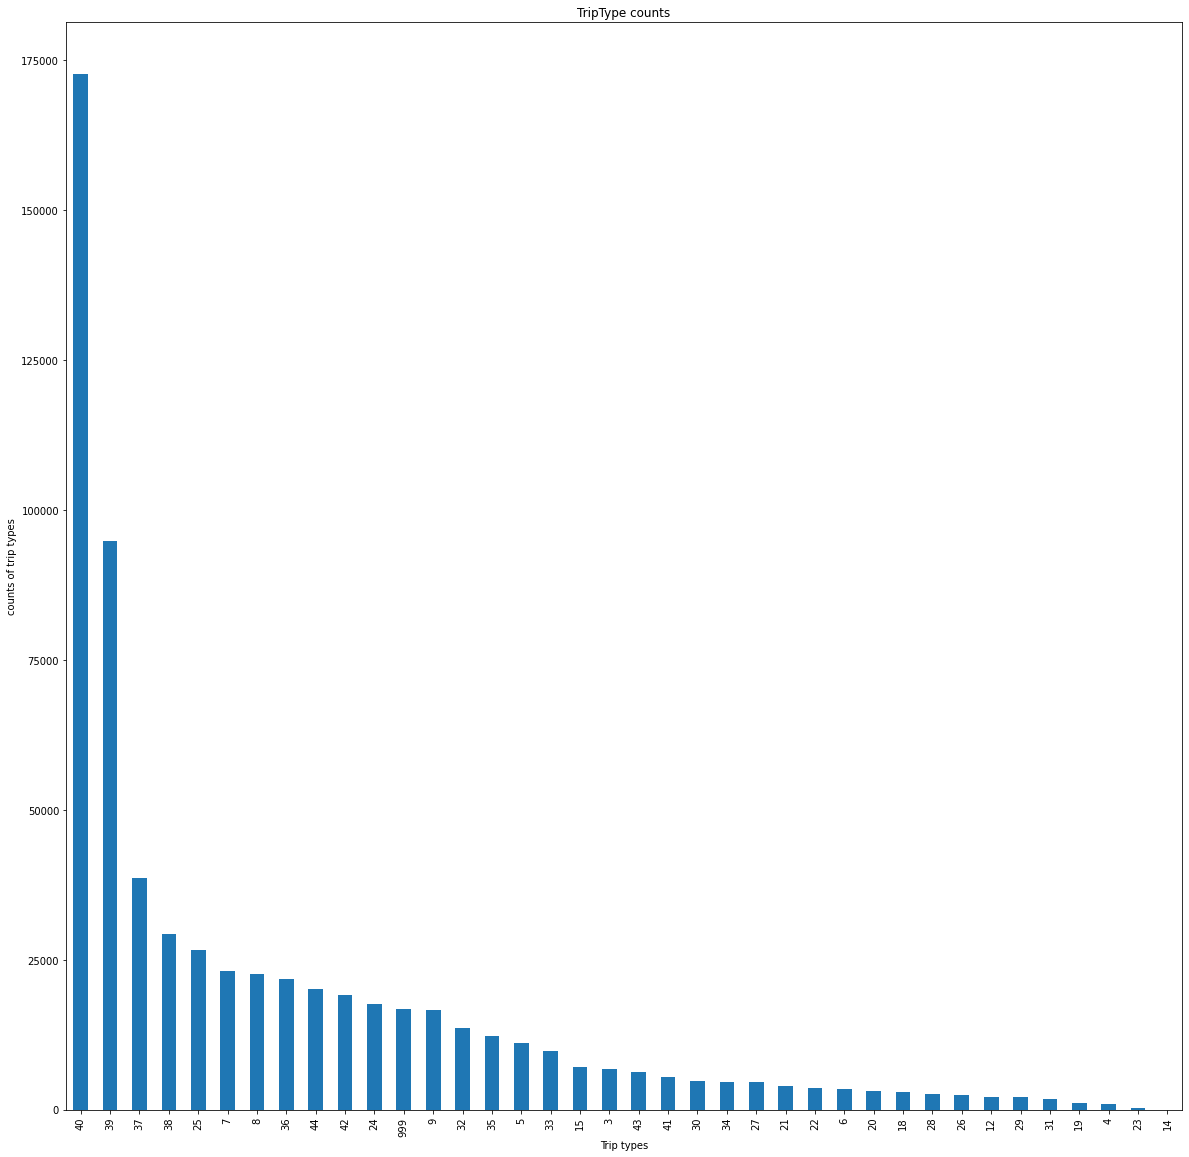

In [236]:
s_nullrem["TripType"].value_counts().plot(kind="bar",figsize=(20,20)) # by using pandas plotting, bar plot of counts of trip type is done  
plt.xlabel ("Trip types")
plt.ylabel ("counts of trip types")
plt.title('TripType counts')
plt.show()

#  [code snippet-22] 

In [237]:
s_nullrem.TripType.value_counts().head(10) # gives the top 10 trip types 

#  [code snippet-23] 

40    172705
39     94856
37     38645
38     29342
25     26642
7      23048
8      22630
36     21848
44     20093
42     19110
Name: TripType, dtype: int64

**Observations[code snippet 20-23]:-**

1- univariate analysis of field 'TripType' of dataset 's_nullrem' is done.

2-count of occurences of different trip types in is done.

3-Variation in counts of the trip types shows that the dataset is imbalanced

4-There are 38 unique trip types are present,which shows that it's a multiclass classification problem. 


In [238]:
s_nullrem.Weekday.value_counts() # counting the number of shopping trips made on each days in a week

#  [code snippet-24] 

Sunday       132304
Saturday     120247
Friday        94663
Monday        81844
Tuesday       71176
Wednesday     69856
Thursday      66894
Name: Weekday, dtype: int64

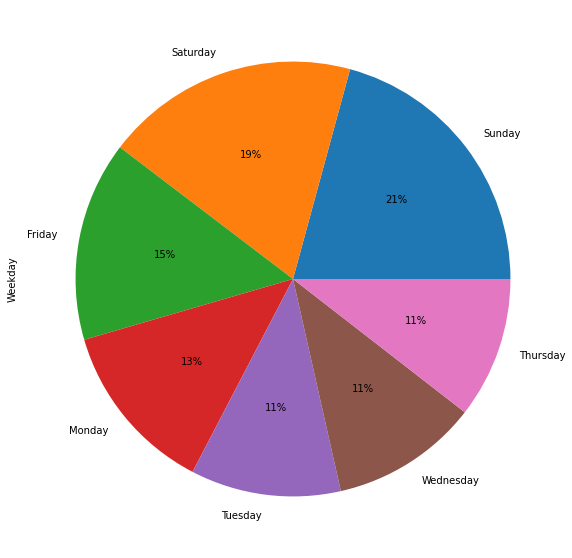

In [239]:
s_nullrem.Weekday.value_counts().plot(kind="pie",figsize=(15, 10),autopct="%1.0f%%")
plt.show()  # plotting the pie chart of the counts of shopping trips made on each days in a week.

#  [code snippet-25] 

**Observations[code snippets 24-25]:-**

1-Analysis of field 'Weekday' of dataset 's_nullrem' is done.

2-Obtained the counts of the shopping trips made on each days in a week.

3-Above analysis shows that maximum shopping trips has been done on Sunday and Saturday. 



In [240]:
s_nullrem.ScanCount.value_counts() # shows the counts of the no. of items purchased or returned
# negative value of scancount shows the no. of items returned 
# positive value shows the no. of itms purchased in a shopping trip.

#  [code snippet-26] 

 1     552292
 2      52747
-1      13869
 3       9403
 4       4525
 5       1377
 6        864
-2        791
 8        246
 7        228
-3        136
 10       130
 9         88
-4         73
 12        60
 11        45
-5         16
 14        15
 13        12
 15        12
-6          9
 20         7
 16         6
 18         4
 24         4
 19         4
 25         3
 17         3
 23         3
 22         2
-9          2
 30         1
 46         1
 51         1
 71         1
-12         1
-10         1
-7          1
 31         1
Name: ScanCount, dtype: int64

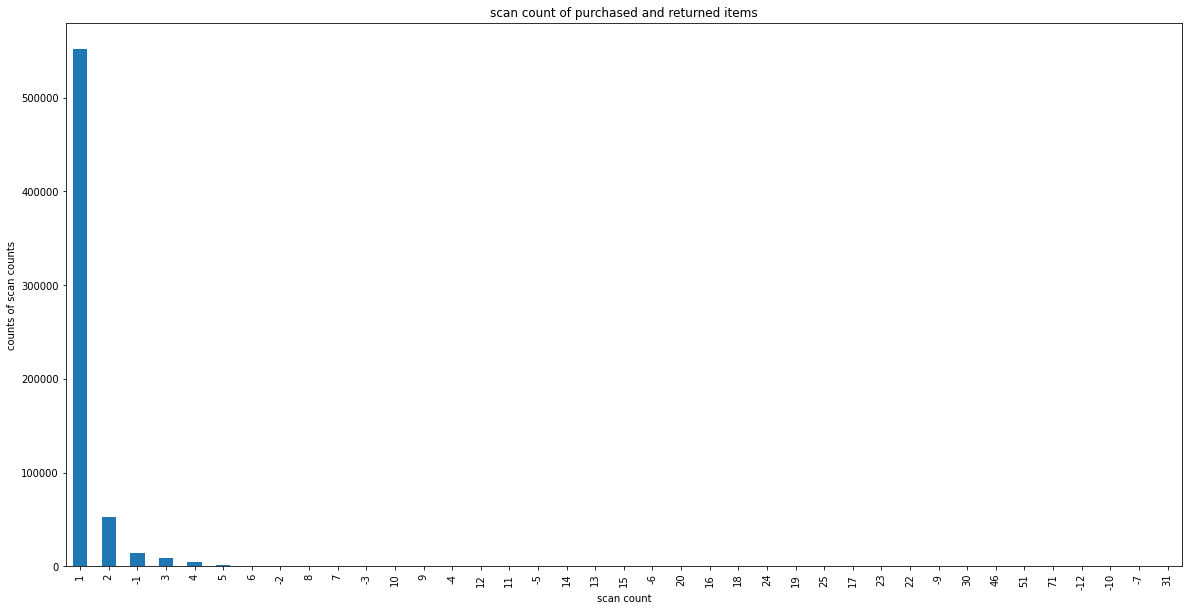

In [241]:
s_nullrem.ScanCount.value_counts().plot(kind="bar",figsize=(20,10)) # bar plot of scan counts
plt.xlabel('scan count')
plt.ylabel('counts of scan counts')
plt.title('scan count of purchased and returned items')                                        #  [code snippet-27] 
plt.show()

**Observations[code snippet 26-27]:-**

1-Above analysis shows the counts of the number of products purchased or returned by the customers in shopping trips.

2-Most of the customers purchase 1 or 2 products while shopping.

3-Some customers also returns, mostly 1 item out of their purchase.   


In [242]:
s_nullrem.DepartmentDescription.value_counts() #shows the counts of the  products purchased in each department

  #  [code snippet-28] 

GROCERY DRY GOODS         70033
DSD GROCERY               67682
PRODUCE                   50826
DAIRY                     43599
PERSONAL CARE             41885
                          ...  
LARGE HOUSEHOLD GOODS        77
CONCEPT STORES               35
OTHER DEPARTMENTS            29
SEASONAL                     29
HEALTH AND BEAUTY AIDS        2
Name: DepartmentDescription, Length: 68, dtype: int64

In [243]:
s_nullrem.DepartmentDescription.unique() # finding the unique departments present in DepartmentDescription column 

#  [code snippet-29] 

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
    

In [244]:
len(s_nullrem.DepartmentDescription.unique()) # sum of the number of unique departments present in DepartmentDescription.

#  [code snippet-30] 

68

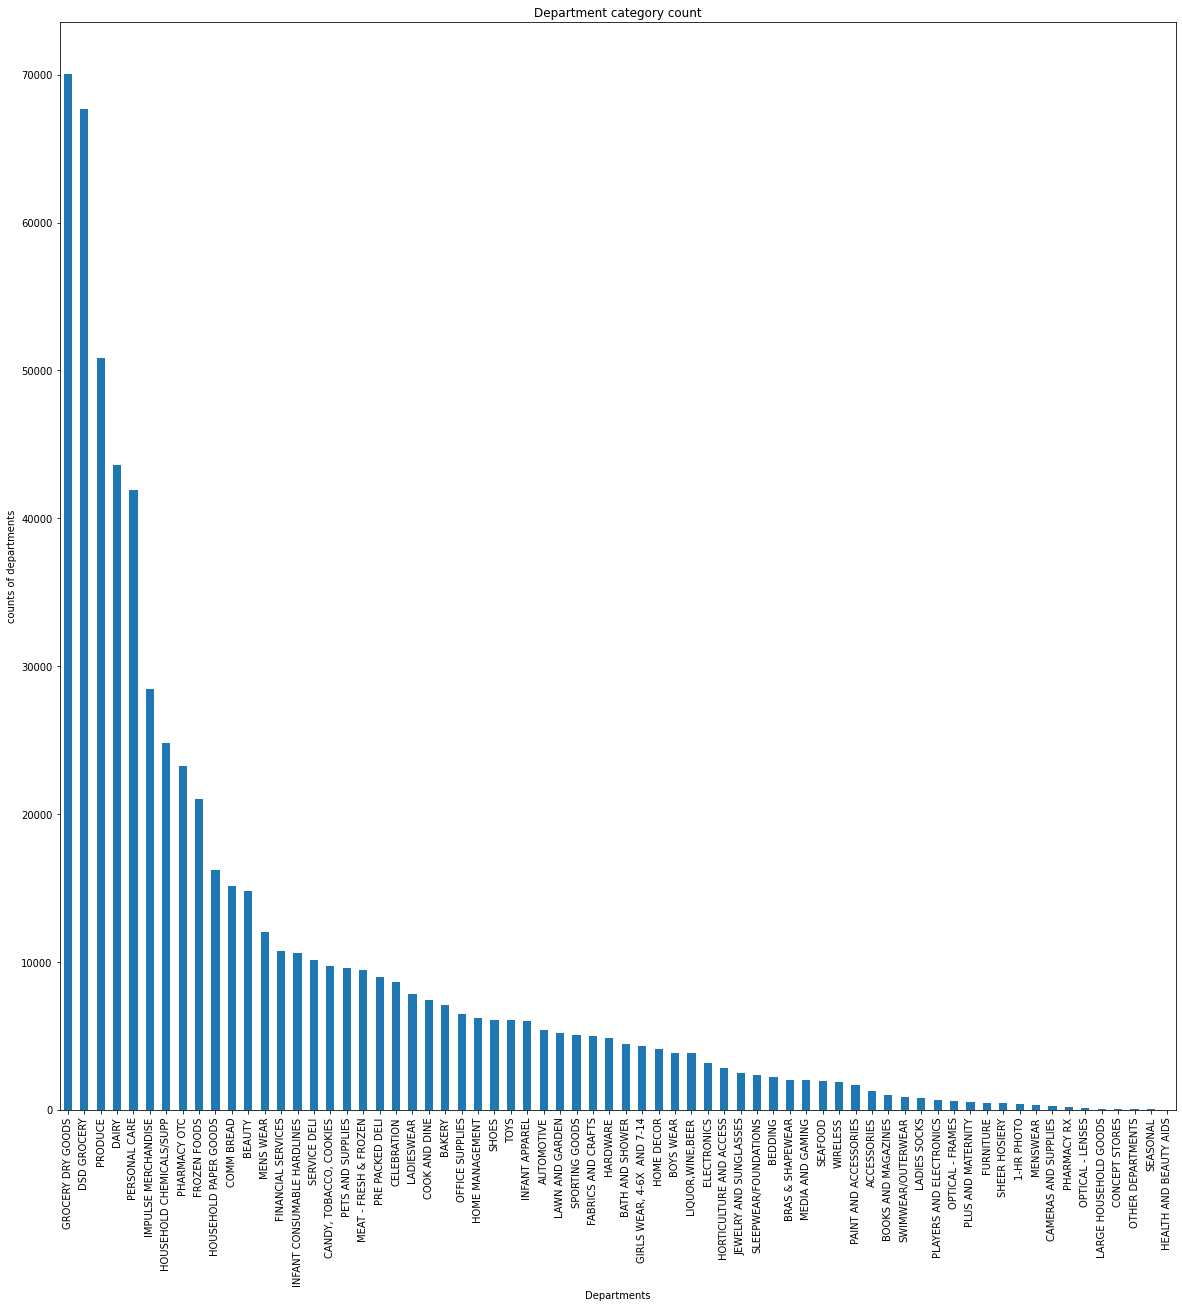

In [245]:
s_nullrem.DepartmentDescription.value_counts().plot(kind="bar",figsize=(20,20))
# bar plot of the counts of the departments according to the purchase.

plt.xlabel('Departments')
plt.ylabel('counts of departments')
plt.title('Department category count')                                #  [code snippet-31] 
plt.show()

In [246]:
s_nullrem.DepartmentDescription.value_counts().head(20) # shows top 20 departments that are most visited by customers

#  [code snippet-32] 

GROCERY DRY GOODS              70033
DSD GROCERY                    67682
PRODUCE                        50826
DAIRY                          43599
PERSONAL CARE                  41885
IMPULSE MERCHANDISE            28458
HOUSEHOLD CHEMICALS/SUPP       24804
PHARMACY OTC                   23243
FROZEN FOODS                   20984
HOUSEHOLD PAPER GOODS          16211
COMM BREAD                     15112
BEAUTY                         14816
MENS WEAR                      12004
FINANCIAL SERVICES             10713
INFANT CONSUMABLE HARDLINES    10584
SERVICE DELI                   10110
CANDY, TOBACCO, COOKIES         9717
PETS AND SUPPLIES               9606
MEAT - FRESH & FROZEN           9453
PRE PACKED DELI                 9004
Name: DepartmentDescription, dtype: int64

**Observations[code snippets 28-32]:-**

1-There are 68 unique departments present in the DepartmentDescription column.

2-'GROCERY DRY GOODS' department have received the maximum attention of the customers 

**Bivariate Analysis:-**

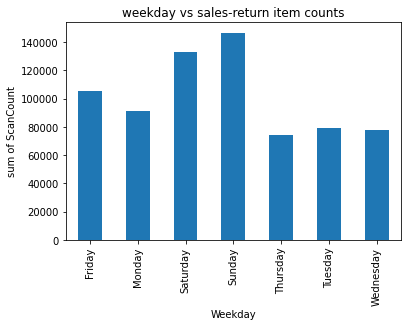

In [249]:
s_nullrem.groupby(['Weekday'])['ScanCount'].sum().plot.bar()# bar plot of columns Weekday and Scancount
plt.xlabel('Weekday')
plt.ylabel('sum of ScanCount')
plt.title('weekday vs sales-return item counts')
plt.show()

#  [code snippet-33] 

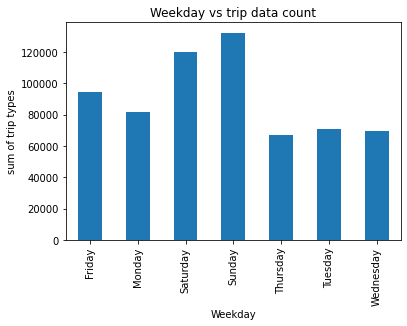

In [256]:
s_nullrem.groupby(['Weekday'])['TripType'].count().plot.bar() #bar plot of weekday and TripType
plt.xlabel('Weekday')
plt.ylabel('sum of trip types')
plt.title('Weekday vs trip data count')
plt.show()

#  [code snippet-34] 

**Observations[code snippet 33-34]:-**

Analysis by plotting 2 bar plots i.e between 'Weekday', 'ScanCount' and 'Weekday', 'TripType':

1-From above plots it can be seen that on sunday there is maximum purchase of the products i.e most shopping trips
  are made on sunday and maximum products are purchased or returned on sunday.    

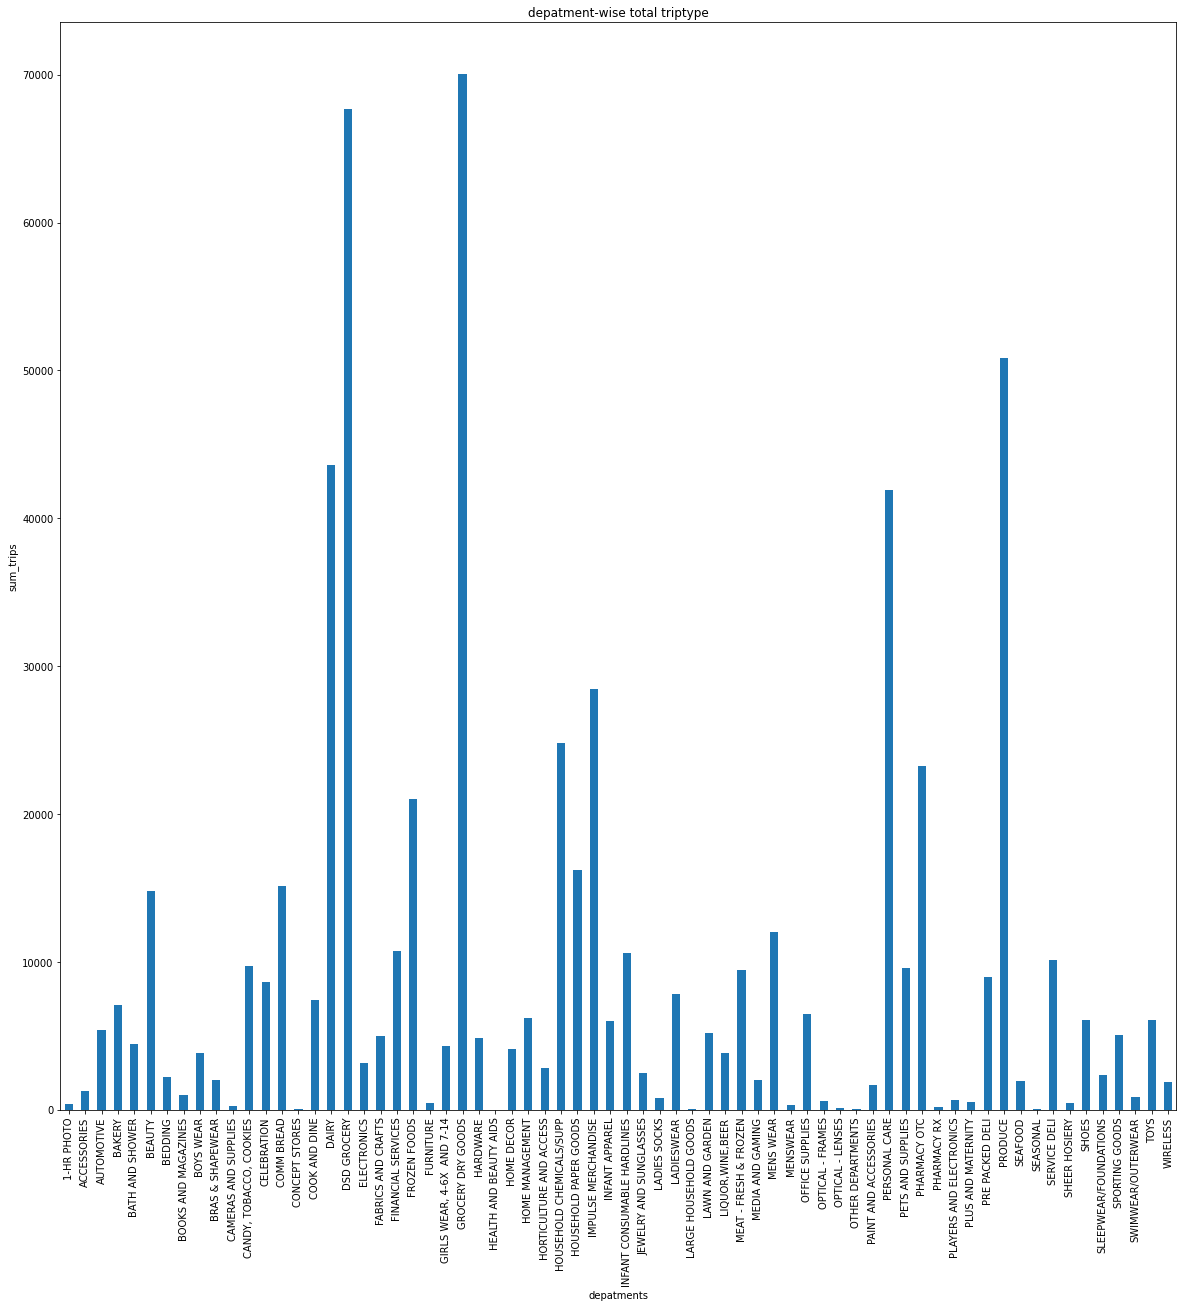

In [258]:
s_nullrem.groupby(['DepartmentDescription'])['TripType'].count().plot(kind='bar', figsize=(20,20))
# bar plot of columns DepartmentDescription and TripType
plt.xlabel('depatments')
plt.ylabel('sum_trips')
plt.title('depatment-wise total triptype')
plt.show()

#  [code snippet-35] 

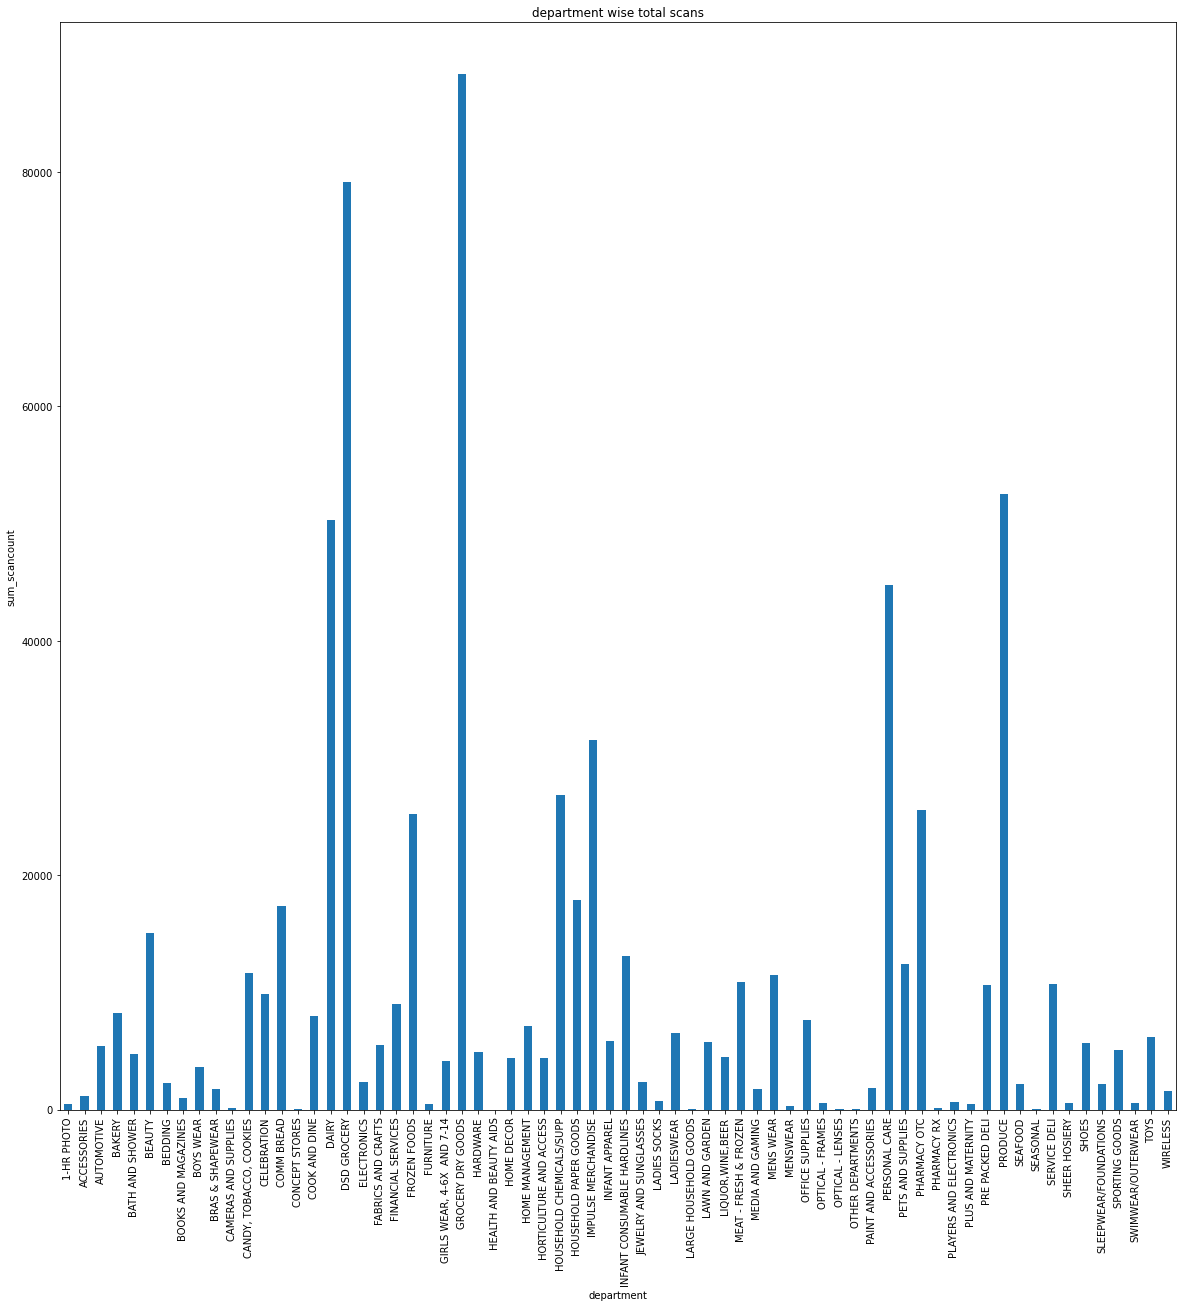

In [257]:
s_nullrem.groupby(['DepartmentDescription'])['ScanCount'].sum().plot(kind='bar', figsize=(20,20))
# bar plot of columns DepartmentDescription and ScanCount
plt.xlabel('department')
plt.ylabel('sum_scancount')
plt.title('department wise total scans')
plt.show()

#  [code snippet-36] 

**Observations[code snippet 35-36]:-**

1-Bivariate analysis by plotting 2 bar plots i.e between 'DepartmentDescription', 'ScanCount' and 'DepartmentDescription', 'TripType'.

2-From above plots it can be seen that 'GROCERY DRY GOODS' of DepartmentDescription has maximum sale and maximum number of shopping trips are also made in this department.

In [45]:
s_nullrem.columns #this code gives the information about columns present in dataset 's_nullrem' 

#  [code snippet-37] 

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [46]:
s_week = s_nullrem[['TripType','Weekday']].value_counts() 
# calculating the counts of shopping trips made on specific trip type,on different days.
# this counts is calculated by merging columns 'TripType' and 'Weekday'.

s_week = s_week.reset_index()
# calculation value counts code will take columns as index value,
# so to prevent this we reset the index 

s_week.head(20) # "s_week.head(20)" will print counts of columns 'TripType' and 'Weekday' in long format.

#  [code snippet-38] 

,TripType,Weekday,0
0,40,Sunday,42673
1,40,Saturday,36061
2,40,Friday,22786
3,40,Monday,22209
4,39,Sunday,19302
5,40,Tuesday,17792
6,40,Wednesday,16623
7,39,Saturday,16589
8,40,Thursday,14561
9,39,Friday,14457


In [47]:
s_week.columns = ['TripType','Weekday','Value'] #coloumn renamed
s_week.columns

#  [code snippet-39] 

Index(['TripType', 'Weekday', 'Value'], dtype='object')

In [84]:
s_week_wide = pd.pivot(s_week, index=['TripType'],columns='Weekday',values='Value')
# since output of 'code snippet 38' is in long format,
# so for better visualization we convert it into wide format by using pivot function.

s_week_wide = s_week_wide.fillna(0)  # replacing nan in counts with zero

s_week_wide.head(38)

#  [code snippet-40] 

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
TripType,,,,,,,
3,1406.0,829.0,1167.0,901.0,760.0,855.0,896.0
4,149.0,110.0,163.0,148.0,105.0,96.0,118.0
5,1754.0,1454.0,1957.0,1551.0,1452.0,1463.0,1550.0
6,648.0,333.0,848.0,441.0,376.0,343.0,380.0
7,3220.0,3278.0,3547.0,3988.0,2850.0,2950.0,3215.0
8,3540.0,3089.0,3591.0,3672.0,2880.0,2978.0,2880.0
9,2727.0,2000.0,3119.0,2903.0,2009.0,1789.0,2008.0
12,294.0,205.0,660.0,546.0,92.0,182.0,113.0
14,7.0,10.0,12.0,0.0,0.0,0.0,0.0


In [106]:
s_week_t = s_week_wide.T # Transposing 's_week_wide' for better visualization of data.
s_week_t

#  [code snippet-41] 

TripType,3,4,5,6,7,8,9,12,14,15,...,36,37,38,39,40,41,42,43,44,999
Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,1406.0,149.0,1754.0,648.0,3220.0,3540.0,2727.0,294.0,7.0,1467.0,...,3563.0,5647.0,4082.0,14457.0,22786.0,851.0,2877.0,1115.0,2867.0,2637.0
Monday,829.0,110.0,1454.0,333.0,3278.0,3089.0,2000.0,205.0,10.0,636.0,...,2771.0,5352.0,4291.0,12792.0,22209.0,545.0,1997.0,815.0,2205.0,2264.0
Saturday,1167.0,163.0,1957.0,848.0,3547.0,3591.0,3119.0,660.0,12.0,1477.0,...,4114.0,6704.0,4330.0,16589.0,36061.0,1183.0,3949.0,1193.0,4401.0,2851.0
Sunday,901.0,148.0,1551.0,441.0,3988.0,3672.0,2903.0,546.0,0.0,1107.0,...,3792.0,9062.0,6221.0,19302.0,42673.0,1264.0,4109.0,1141.0,4164.0,2799.0
Thursday,760.0,105.0,1452.0,376.0,2850.0,2880.0,2009.0,92.0,0.0,937.0,...,2714.0,3891.0,3079.0,10489.0,14561.0,649.0,2121.0,616.0,2119.0,2049.0
Tuesday,855.0,96.0,1463.0,343.0,2950.0,2978.0,1789.0,182.0,0.0,630.0,...,2407.0,4205.0,3822.0,10935.0,17792.0,417.0,1930.0,626.0,1825.0,2135.0
Wednesday,896.0,118.0,1550.0,380.0,3215.0,2880.0,2008.0,113.0,0.0,793.0,...,2487.0,3784.0,3517.0,10292.0,16623.0,495.0,2127.0,764.0,2512.0,2134.0


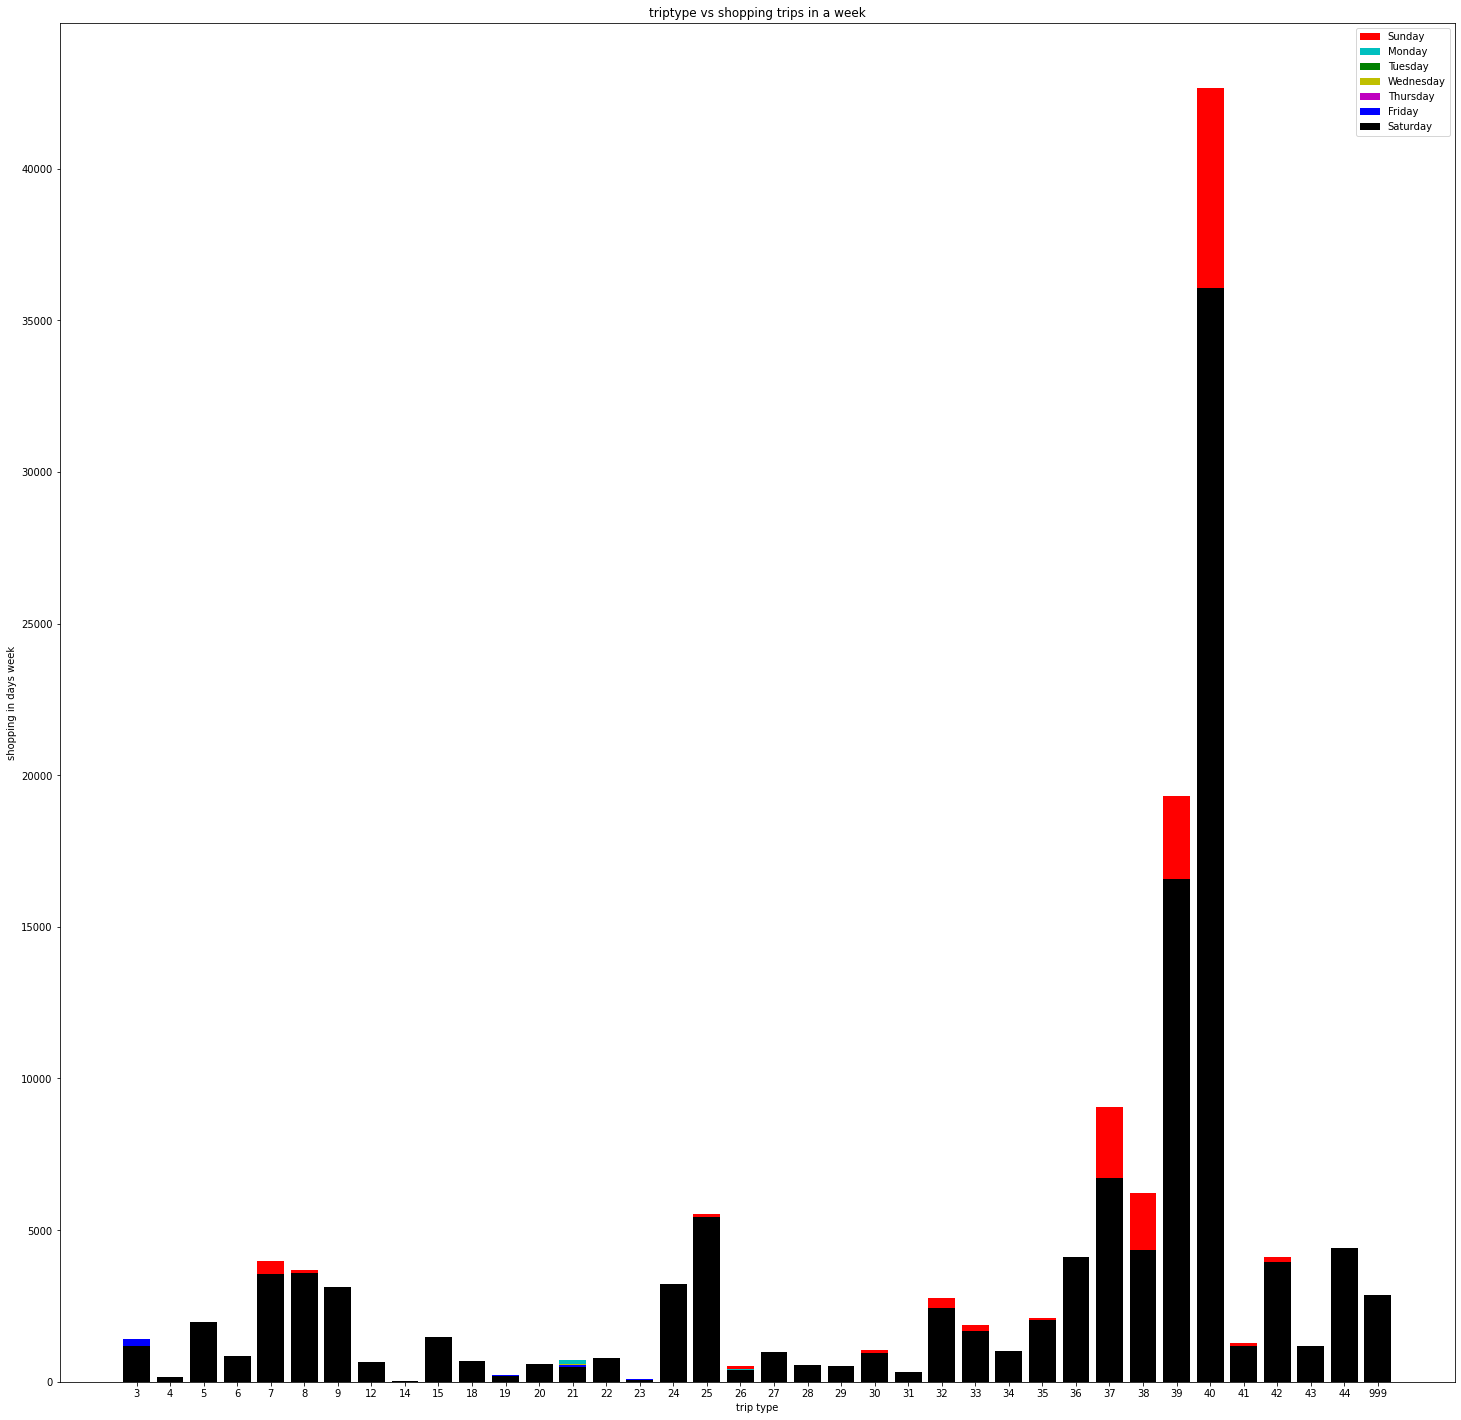

In [253]:
f = plt.figure()    #setting the size of the plot
f.set_figwidth(25)
f.set_figheight(25)

x = s_week_t.columns # placing all the columns of 's_week_t' i.e trip types in variable 'x'  
x2 = [str(i) for i in x]   # converting the values of 'x' in form of string and placing them list 'x2' 

y1 = s_week_t.loc['Sunday',:] # assigning each days or rows of 's_week_t' in variables y1,y2,y3,y4,y5,y6,y7
y2 = s_week_t.loc['Monday',:]
y3 = s_week_t.loc['Tuesday',:]
y4 = s_week_t.loc['Wednesday',:]
y5 = s_week_t.loc['Thursday',:]
y6 = s_week_t.loc['Friday',:]
y7 = s_week_t.loc['Saturday',:]

plt.bar(x2,y1,color = 'r')   # using bar plot to plot the above created variables
plt.bar(x2,y2,color='c')
plt.bar(x2,y3,color='g')
plt.bar(x2,y4,color='y')
plt.bar(x2,y5,color='m')
plt.bar(x2,y6,color='b')
plt.bar(x2,y7,color='k')

plt.legend(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
# creating legend according to days
plt.xlabel('trip type')
plt.ylabel('shopping in days week')
plt.title('triptype vs shopping trips in a week' )

plt.show()

#  [code snippet-42] 

**Observations[code snippet 37-42]:-**

1-Analysis between columns 'TripType' and 'Weekday' is performed.

2-From the above analysis, we can see the shopping trips of the customers, for different trip types present in column             "TripType" corresponding to the days in a week.   

In [154]:
f1=s_nullrem.groupby(['TripType','DepartmentDescription']).size()
# grouping the columns 'TripType' and 'DepartmentDescription'. 
f1

#  [code snippet-43] 

TripType  DepartmentDescription
3         1-HR PHOTO                 2
          ACCESSORIES                2
          AUTOMOTIVE                20
          BAKERY                     5
          BATH AND SHOWER            8
                                  ... 
999       SLEEPWEAR/FOUNDATIONS    147
          SPORTING GOODS           350
          SWIMWEAR/OUTERWEAR       143
          TOYS                     318
          WIRELESS                 221
Length: 2111, dtype: int64

In [155]:
f2 = f1.reset_index() # resetting index
f2.columns = ['TripType', 'DepartmentDescription','count_values']
f2

#  [code snippet-44] 

,TripType,DepartmentDescription,count_values
0,3,1-HR PHOTO,2
1,3,ACCESSORIES,2
2,3,AUTOMOTIVE,20
3,3,BAKERY,5
4,3,BATH AND SHOWER,8
...,...,...,...
2106,999,SLEEPWEAR/FOUNDATIONS,147
2107,999,SPORTING GOODS,350
2108,999,SWIMWEAR/OUTERWEAR,143
2109,999,TOYS,318


In [156]:
f1_df_max_prod = f2.groupby(['TripType']).agg(max_category_count=('count_values',np.max))
# calculating the max count of each trip type. 
f1_df_max_prod

#  [code snippet-45] 

,max_category_count
TripType,
3,5363
4,562
5,5261
6,990
7,3666
8,4710
9,1373
12,276
14,10


In [157]:
f1_max_prod_cat = pd.merge(f1_df_max_prod,f2, left_on=['TripType','max_category_count'],
                          right_on=['TripType','count_values'])
# merging the tables 'f1_df_max_prod' and 'f2'.
f1_max_prod_cat

#  [code snippet-46] 

,TripType,max_category_count,DepartmentDescription,count_values
0,3,5363,FINANCIAL SERVICES,5363
1,4,562,PHARMACY OTC,562
2,5,5261,PHARMACY OTC,5261
3,6,990,"LIQUOR,WINE,BEER",990
4,7,3666,SERVICE DELI,3666
5,8,4710,DSD GROCERY,4710
6,9,1373,MENS WEAR,1373
7,12,276,DSD GROCERY,276
8,12,276,HOUSEHOLD PAPER GOODS,276
9,14,10,FABRICS AND CRAFTS,10


**Observations[code snippet 43-46]:-**

1-Analysis between columns 'TripType' and 'DepartmentDescription' is performed.

2-From the above analysis, most visited product departments along with their max counts values, for each trip types can be observed.  

**Performing chi-sq test for finding correlation among the categorical variables "TripType", "Weekday", and  "DepartmentDescription":-**

**Finding correlation between 2 categorical variables,i.e 'TripType' and 'Weekday':-**

In [174]:
import scipy.stats as stats       # importing modules/libraries for chi-sq test
from scipy.stats import chi2_contingency


#  [code snippet-47] 

In [175]:
dataset_table=pd.crosstab(s_nullrem['Weekday'],s_nullrem['TripType'])
dataset_table # for better data visualization we are creating the table between 'Weekday' and 'TripType'
# This is the same table that we created in code snippet 41, but here we are using different approach for creating the table.


#  [code snippet-48] 

TripType,3,4,5,6,7,8,9,12,14,15,...,36,37,38,39,40,41,42,43,44,999
Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,1406,149,1754,648,3220,3540,2727,294,7,1467,...,3563,5647,4082,14457,22786,851,2877,1115,2867,2637
Monday,829,110,1454,333,3278,3089,2000,205,10,636,...,2771,5352,4291,12792,22209,545,1997,815,2205,2264
Saturday,1167,163,1957,848,3547,3591,3119,660,12,1477,...,4114,6704,4330,16589,36061,1183,3949,1193,4401,2851
Sunday,901,148,1551,441,3988,3672,2903,546,0,1107,...,3792,9062,6221,19302,42673,1264,4109,1141,4164,2799
Thursday,760,105,1452,376,2850,2880,2009,92,0,937,...,2714,3891,3079,10489,14561,649,2121,616,2119,2049
Tuesday,855,96,1463,343,2950,2978,1789,182,0,630,...,2407,4205,3822,10935,17792,417,1930,626,1825,2135
Wednesday,896,118,1550,380,3215,2880,2008,113,0,793,...,2487,3784,3517,10292,16623,495,2127,764,2512,2134


In [176]:
dataset_table.values #checking values inside the table


#  [code snippet-49] 

array([[ 1406,   149,  1754,   648,  3220,  3540,  2727,   294,     7,
         1467,   583,   222,   477,   561,   516,    81,  2729,  4239,
          384,   791,   427,   293,   509,   301,  2175,  1579,   776,
         1926,  3563,  5647,  4082, 14457, 22786,   851,  2877,  1115,
         2867,  2637],
       [  829,   110,  1454,   333,  3278,  3089,  2000,   205,    10,
          636,   348,   119,   350,   709,   432,    17,  2548,  2816,
          418,   406,   292,   233,   584,   212,  1631,  1299,   579,
         1666,  2771,  5352,  4291, 12792, 22209,   545,  1997,   815,
         2205,  2264],
       [ 1167,   163,  1957,   848,  3547,  3591,  3119,   660,    12,
         1477,   686,   196,   593,   497,   800,    62,  3230,  5425,
          374,   985,   542,   525,   936,   325,  2430,  1675,  1004,
         2046,  4114,  6704,  4330, 16589, 36061,  1183,  3949,  1193,
         4401,  2851],
       [  901,   148,  1551,   441,  3988,  3672,  2903,   546,     0,
        

In [177]:
observed_values=dataset_table.values # this is the observed values.  
print('observed values:-',observed_values)


#  [code snippet-50] 

observed values:- [[ 1406   149  1754   648  3220  3540  2727   294     7  1467   583   222
    477   561   516    81  2729  4239   384   791   427   293   509   301
   2175  1579   776  1926  3563  5647  4082 14457 22786   851  2877  1115
   2867  2637]
 [  829   110  1454   333  3278  3089  2000   205    10   636   348   119
    350   709   432    17  2548  2816   418   406   292   233   584   212
   1631  1299   579  1666  2771  5352  4291 12792 22209   545  1997   815
   2205  2264]
 [ 1167   163  1957   848  3547  3591  3119   660    12  1477   686   196
    593   497   800    62  3230  5425   374   985   542   525   936   325
   2430  1675  1004  2046  4114  6704  4330 16589 36061  1183  3949  1193
   4401  2851]
 [  901   148  1551   441  3988  3672  2903   546     0  1107   600   186
    595   553   690    85  3129  5517   511   916   449   441  1063   302
   2756  1873   750  2104  3792  9062  6221 19302 42673  1264  4109  1141
   4164  2799]
 [  760   105  1452   376  2850  2

In [178]:
v=stats.chi2_contingency(dataset_table) 
# performing 'chi2_contingency' function present in 'stats' library, to calculate the expected value
# expected values are present in form of ndarray in 3rd index of 'v' as shown. 
v


#  [code snippet-51] 

(10708.499800031583,
 0.0,
 222,
 array([[1.01263718e+03, 1.32115417e+02, 1.66162259e+03, 5.00671362e+02,
         3.42519251e+03, 3.36307300e+03, 2.46025954e+03, 3.10894773e+02,
         4.30972677e+00, 1.04726361e+03, 4.35579627e+02, 1.75807130e+02,
         4.59208818e+02, 5.88054788e+02, 5.28015836e+02, 4.80014396e+01,
         2.62492083e+03, 3.95930140e+03, 3.68110111e+02, 6.73654878e+02,
         3.88321244e+02, 3.10597550e+02, 7.14077143e+02, 2.60366942e+02,
         2.03642021e+03, 1.46382099e+03, 6.96095180e+02, 1.83371444e+03,
         3.24685899e+03, 5.74308246e+03, 4.36055183e+03, 1.40966704e+04,
         2.56659091e+04, 8.03095293e+02, 2.83996133e+03, 9.31792651e+02,
         2.98604621e+03, 2.50692348e+03],
        [8.75508672e+02, 1.14224715e+02, 1.43661028e+03, 4.32871840e+02,
         2.96136247e+03, 2.90765501e+03, 2.12709804e+03, 2.68794268e+02,
         3.72611557e+00, 9.05446083e+02, 3.76594646e+02, 1.51999818e+02,
         3.97024038e+02, 5.08422045e+02, 4.565134

In [179]:
expected_values=v[3] #this is the expected values


#  [code snippet-52] 

In [180]:
no_of_rows=len(dataset_table.iloc[0:7,0]) # no. of rows and columns present in 'dataset_table'.
no_of_columns=len(dataset_table.iloc[0,0:38])
dof=(no_of_rows-1)*(no_of_columns-1) # calculating degree of freedom
print('degree of freedom:-',dof)
alpha=0.05   
# this alpha value is set to 5%, this shows the variation that we need to capture i.e here 95% variation is to be captured. 


#  [code snippet-53] 

degree of freedom:- 222


In [181]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_stats=chi_square[0]+chi_square[1]
#calculating chi-sq value by using observed and expected value


#  [code snippet-54] 

In [182]:
print('chi-square statistics:-',chi_square_stats)


#  [code snippet-55] 

chi-square statistics:- 412.6981247353643


In [183]:
critical_value=chi2.ppf(q=1-alpha,df=dof) # calculating the critical value.
print('critical value:-',critical_value )


#  [code snippet-56] 

critical value:- 257.7584654845151


In [184]:
if chi_square_stats>=critical_value:
    print('there is relationship between categorical variables Weekday and TripType')
else:
    print('no relation existys between categorical variables Weekday and TripTypes')


#  [code snippet-57]     

there is relationship between categorical variables Weekday and TripType


**Finding correlation between 2 categorical variables,i.e "TripTypes" and "DepartmentDescription":-**

[NOTE]-Same analysis as above is to be performed here also for checking correlation, so a function can also be defined for the checking correlation, which will give more crip code, but since 3 categorical variables i.e'TripTypes','DepartmentDescription', and 'Weekday' is used for our analysis, which means only 2 chi-sq tests is needed to be performed, so here I am not defining a function and instead using conventional approach and rewriting the code such that both chi-sq tests can be seen and observed vividly.  

In [189]:
dataset_table1=pd.crosstab(s_nullrem['DepartmentDescription'],s_nullrem['TripType'])
# for better data visualization we are creating the table between 'DepartmentDescription' and 'TripType'

dataset_table1 #checking values inside the table


#  [code snippet-58] 

TripType,3,4,5,6,7,8,9,12,14,15,...,36,37,38,39,40,41,42,43,44,999
DepartmentDescription,,,,,,,,,,,,,,,,,,,,,
1-HR PHOTO,2,0,1,1,3,0,76,0,0,17,...,7,0,2,0,1,1,7,1,0,69
ACCESSORIES,2,1,16,3,11,6,178,0,0,7,...,31,18,14,92,101,67,143,22,75,57
AUTOMOTIVE,20,3,38,5,31,56,882,4,0,5,...,88,58,56,432,408,104,376,129,209,342
BAKERY,5,13,65,23,890,470,61,16,0,212,...,80,540,511,1361,1675,36,89,50,126,154
BATH AND SHOWER,8,0,23,6,5,34,217,14,0,12,...,115,55,17,334,523,142,421,98,351,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLEEPWEAR/FOUNDATIONS,2,0,16,4,11,9,172,1,0,16,...,49,33,24,149,276,37,174,37,161,147
SPORTING GOODS,16,2,38,9,29,31,650,17,0,14,...,60,48,24,322,416,187,424,98,205,350
SWIMWEAR/OUTERWEAR,2,0,0,0,3,9,55,2,0,3,...,10,13,0,42,60,58,25,14,42,143


In [190]:
observed_values1=dataset_table1.values # this is the observed values.  
print('observed values:-',observed_values1)


#  [code snippet-59] 

observed values:- [[  2   0   1 ...   1   0  69]
 [  2   1  16 ...  22  75  57]
 [ 20   3  38 ... 129 209 342]
 ...
 [  2   0   0 ...  14  42 143]
 [  6   2  19 ... 117 315 318]
 [  3   0  11 ...   7  21 221]]


In [192]:
v1=stats.chi2_contingency(dataset_table1)
# performing 'chi2_contingency' function present in 'stats' library, to calculate the expected value
# expected values are present in form of ndarray in 3rd index of 'v1' as shown. 
v1


#  [code snippet-60] 

(2216411.669413346,
 0.0,
 2479,
 array([[  4.13984967,   0.54011247,   6.79302306, ...,   3.80934215,
          12.20751385,  10.24877077],
        [ 13.29672645,   1.73477984,  21.81841773, ...,  12.23517388,
          39.20914654,  32.91788648],
        [ 57.39093918,   7.48760565,  94.17201217, ...,  52.80909725,
         169.23336379, 142.07921235],
        ...,
        [  9.18896864,   1.19885429,  15.07805377, ...,   8.45536152,
          27.09626458,  22.74856354],
        [ 64.60090991,   8.42826664, 106.00275517, ...,  59.44345541,
         190.49399514, 159.92849271],
        [ 20.20717318,   2.63636292,  33.15767586, ...,  18.59392073,
          59.58654691,  50.02565371]]))

In [193]:
expected_values=v1[3] #this is the expected values


#  [code snippet-61] 

In [194]:
no_of_rows1=len(dataset_table1.iloc[0:68,0]) # no. of rows and columns present in 'dataset_table1'
no_of_columns1=len(dataset_table1.iloc[0,0:38])
dof1=(no_of_rows1-1)*(no_of_columns1-1)  # calculating degree of freedom
print('degree of freedom:-',dof1)
alpha1=0.05
# this alpha value is set to 5%, this shows the variation that we need to capture i.e here 95% variation is to be captured. 


#  [code snippet-62] 

degree of freedom:- 2479


In [195]:
chi_square1=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_stats1=chi_square1[0]+chi_square1[1]
print('chi-square statistics:-',chi_square_stats1)
#calculating chi-sq value by using observed and expected value.


#  [code snippet-63] 

chi-square statistics:- 659619.5158160763


In [196]:
critical_value1=chi2.ppf(q=1-alpha1,df=dof1)
print('critical value:-',critical_value )
# calculating the critical value.

#  [code snippet-64]     

critical value:- 257.7584654845151


In [197]:
if chi_square_stats1>=critical_value1:
    print('there is relationship between categorical variables DepartmentDescription and TripType')
else:
    print('no relation existys between categorical variables DepartmentDescription and TripTypes')
    

#  [code snippet-65]     

there is relationship between categorical variables DepartmentDescription and TripType


**Observations[code snippet 47-65]:-**

1-In order to find correlation between 3 categorical variables chi-sq test is performed.

2-1st test is performed between categorical variables 'TripType' and 'Weekday'.

3-The result of 1st test shows correlation between 'TripType' and 'Weekday'.

4-2nd test is performed between categorical variables 'TripType' and 'DepartmentDescription'.

5-The result of 1st test shows correlation between 'TripType' and 'DepartmentDescription'.